In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahilichake","key":"0d9b319216b6844d5c5e506f671ecc29"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          61943        856  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8436        229  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            298          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

 98% 601M/612M [00:11<00:00, 94.3MB/s]
100% 612M/612M [00:11<00:00, 57.3MB/s]
/content


In [7]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread #imread use to unzip the zip file
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


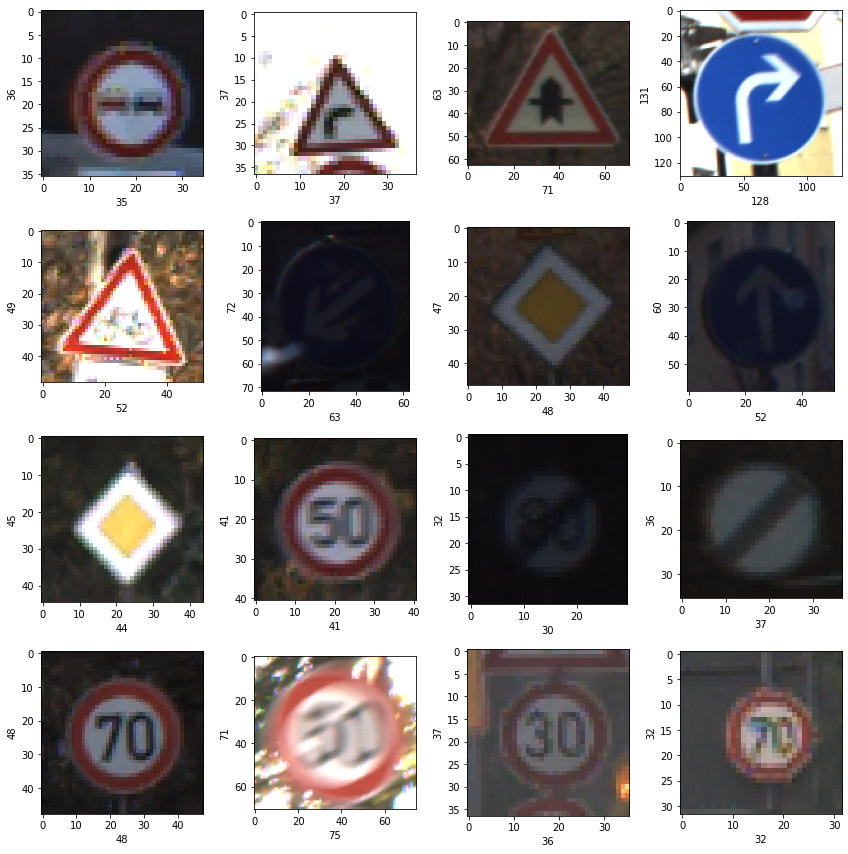

In [9]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))) )
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10) #width of the image
  plt.ylabel(rand_img.shape[0],fontsize=10) #height of img

In [10]:
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img=imread(labels +'/'+ x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [11]:
images = []
label_id =[]
for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels +'/'+ x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [12]:
images = np.array(images)
images = images/255

In [13]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42) #101 and 0

In [15]:
# Fabrication of CNN :
model = Sequential()

# Conv. layer code:
model.add(Conv2D(filters =64, kernel_size=(3,3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Pooling layer code:
model.add(Conv2D(filters =64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Fully Connected layer code : Classification layer code
model.add(Flatten()) # This process convert your 2-D fram into 1-D. To input the data into the next layer.
model.add(Dense(128,activation='relu')) # f(x)=max(0,x) 
model.add(Dropout(0.5)) # This is used for the understanding that the N.N need to contain several neurons. 
model.add(Dense(43,activation='softmax'))



In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val,y_val), verbose=2)

Epoch 1/10
246/246 - 190s - loss: 2.5696 - accuracy: 0.2943 - val_loss: 1.2856 - val_accuracy: 0.6558 - 190s/epoch - 771ms/step
Epoch 2/10
246/246 - 192s - loss: 1.2098 - accuracy: 0.6233 - val_loss: 0.5272 - val_accuracy: 0.8891 - 192s/epoch - 782ms/step
Epoch 3/10
246/246 - 191s - loss: 0.7995 - accuracy: 0.7429 - val_loss: 0.3156 - val_accuracy: 0.9328 - 191s/epoch - 776ms/step
Epoch 4/10
246/246 - 190s - loss: 0.6262 - accuracy: 0.7954 - val_loss: 0.2401 - val_accuracy: 0.9546 - 190s/epoch - 774ms/step
Epoch 5/10
246/246 - 190s - loss: 0.5404 - accuracy: 0.8223 - val_loss: 0.1881 - val_accuracy: 0.9693 - 190s/epoch - 774ms/step
Epoch 6/10
246/246 - 190s - loss: 0.4759 - accuracy: 0.8419 - val_loss: 0.1402 - val_accuracy: 0.9755 - 190s/epoch - 772ms/step
Epoch 7/10
246/246 - 189s - loss: 0.4257 - accuracy: 0.8588 - val_loss: 0.1141 - val_accuracy: 0.9800 - 189s/epoch - 768ms/step
Epoch 8/10
